In [111]:
import pandas as pd
from pathlib import Path

file_path = Path("machine_temp_failure_missing.csv")
df = pd.read_csv(file_path)

In [112]:
print("INSPECTING THE DATASET:\n")
print(df.head())

INSPECTING THE DATASET:

          timestamp      value
0  02-12-2013 21:15  73.967322
1  02-12-2013 21:20  74.935882
2  02-12-2013 21:25  76.124162
3  02-12-2013 21:30  78.140707
4  02-12-2013 21:35  79.329836


In [113]:
print("NUMBER OF MISSING VALUES:\n")
missing_values = df.isnull().sum()
print(missing_values, "\n")
print("MISSING ROWS:\n")
print(df[df.isnull().any(axis=1)])

NUMBER OF MISSING VALUES:

timestamp       0
value        1285
dtype: int64 

MISSING ROWS:

              timestamp  value
2054   10-12-2013 00:25    NaN
2055   10-12-2013 00:30    NaN
2056   10-12-2013 00:35    NaN
2057   10-12-2013 00:40    NaN
2058   10-12-2013 00:45    NaN
...                 ...    ...
22685  19-02-2014 14:40    NaN
22686  19-02-2014 14:45    NaN
22687  19-02-2014 14:50    NaN
22688  19-02-2014 14:55    NaN
22689  19-02-2014 15:00    NaN

[1285 rows x 2 columns]


In [114]:
# Calculate statistics
statistics = df.describe()
print("STATISTICS:\n")
print(statistics)

STATISTICS:

              value
count  21410.000000
mean      85.968188
std       13.553070
min        2.084721
25%       83.082867
50%       89.251290
75%       93.910748
max      108.510543


In [115]:
df.rename(columns={"value": "temperature"}, inplace=True)
print("COLUMN NAME CHANGED:\n")
print(df.head())


COLUMN NAME CHANGED:

          timestamp  temperature
0  02-12-2013 21:15    73.967322
1  02-12-2013 21:20    74.935882
2  02-12-2013 21:25    76.124162
3  02-12-2013 21:30    78.140707
4  02-12-2013 21:35    79.329836


In [116]:
print("DELTA TEMPERATURE:\n")
df['delta_temperature'] = df['temperature'].diff()
print(df.head())

DELTA TEMPERATURE:

          timestamp  temperature  delta_temperature
0  02-12-2013 21:15    73.967322                NaN
1  02-12-2013 21:20    74.935882           0.968560
2  02-12-2013 21:25    76.124162           1.188280
3  02-12-2013 21:30    78.140707           2.016546
4  02-12-2013 21:35    79.329836           1.189128


In [117]:
import matplotlib.pyplot as plt

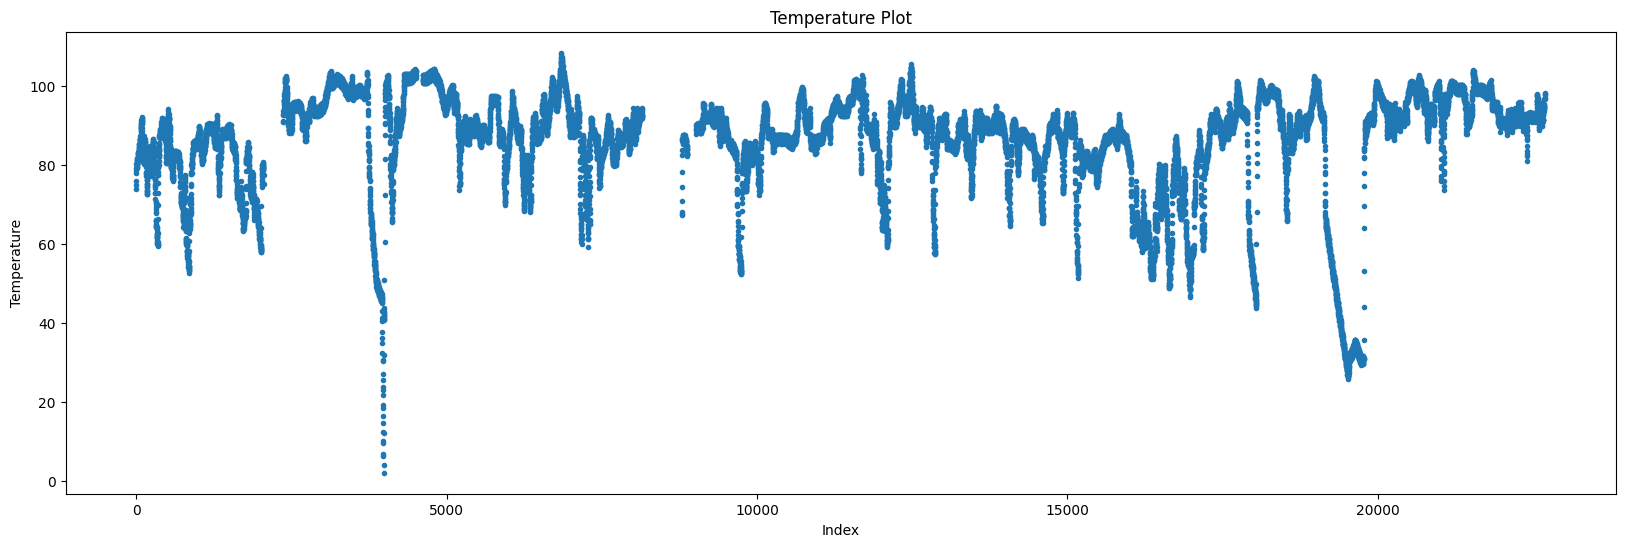

In [118]:
# Plot for temperature
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['temperature'], '.')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Plot')
plt.show()

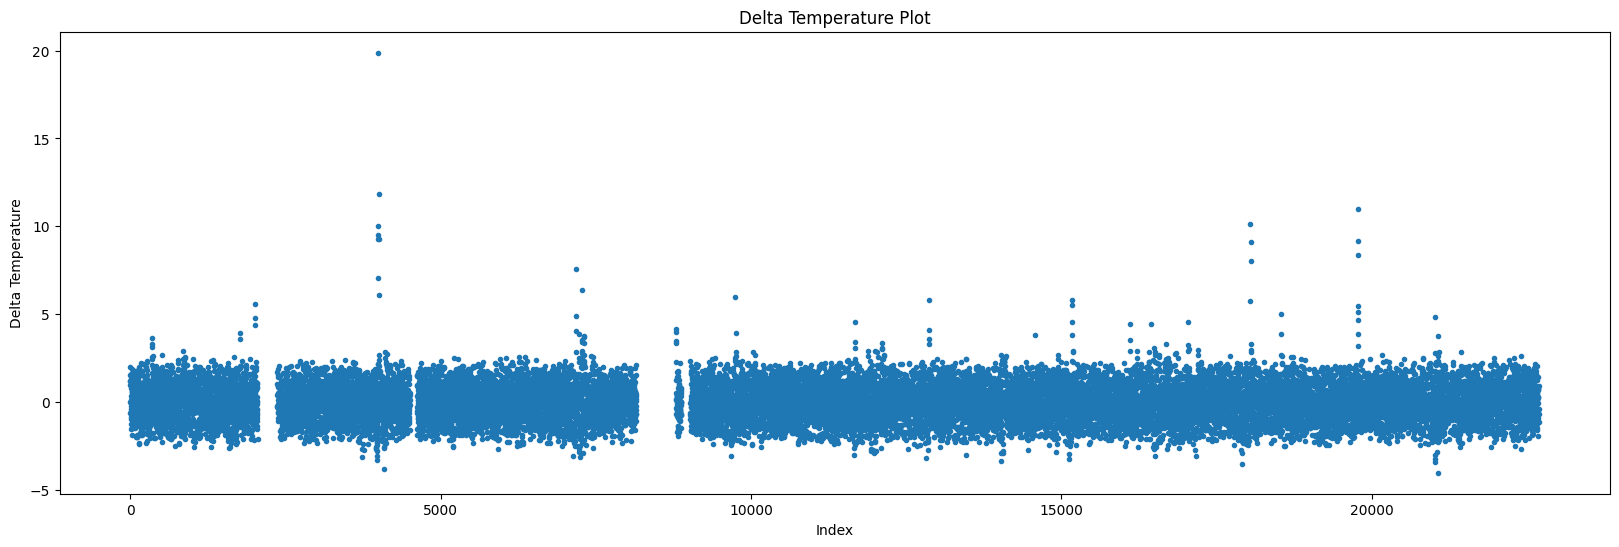

In [119]:
# Plot for delta_temperature
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['delta_temperature'], '.')
plt.xlabel('Index')
plt.ylabel('Delta Temperature')
plt.title('Delta Temperature Plot')
plt.show()

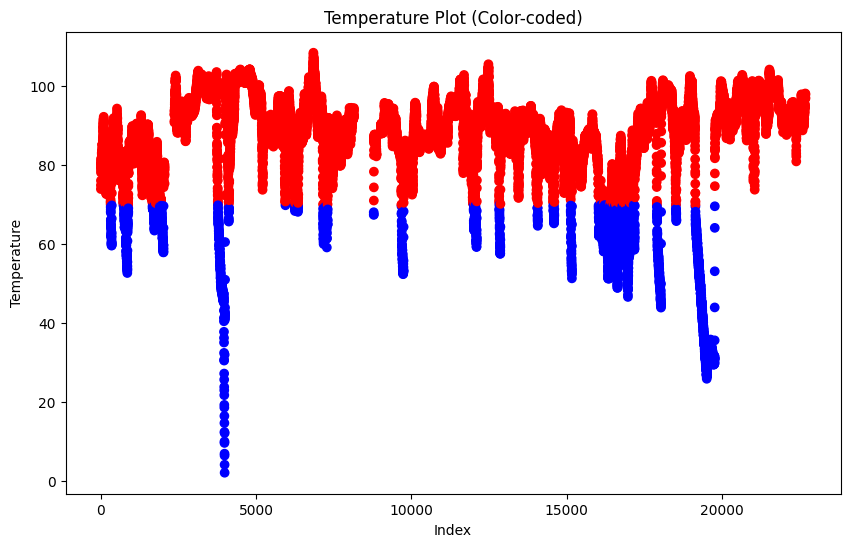

In [120]:
color = ['red' if temp > 70.00 else 'blue' for temp in df['temperature']]

# Plot with color-coded temperature values
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['temperature'], c=color)
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Plot (Color-coded)')
plt.show()

In [121]:
def read_dataset(folder, file, date_col=None):
    df = pd.read_csv(folder / file, index_col=date_col,parse_dates=[date_col])
    return df


In [122]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()

In [123]:
def rmse_score(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

In [124]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

def rmse_score(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse
original_df = pd.read_csv("machine_temp_failure_original.csv")
imputed_df = df
original_df.rename(columns={"value": "temperature"}, inplace=True)
mean_imputation = imputed_df["temperature"].mean()
imputed_df["mean_imputed"] = imputed_df["temperature"].fillna(mean_imputation)
imputed_df["ffill_imputed"] = imputed_df["temperature"].fillna(method="ffill")
imputed_df["bfill_imputed"] = imputed_df["temperature"].fillna(method="bfill")
imputed_df["interpolation_imputed"] = imputed_df["temperature"].interpolate()
simple_imputer = SimpleImputer(strategy="mean")
imputed_df["simple_imputer"] = simple_imputer.fit_transform(imputed_df[["temperature"]])
rmse_mean = rmse_score(original_df["temperature"], imputed_df["mean_imputed"],)
rmse_ffill = rmse_score(original_df["temperature"], imputed_df["ffill_imputed"])
rmse_bfill = rmse_score(original_df["temperature"], imputed_df["bfill_imputed"])
rmse_interpolation = rmse_score( original_df["temperature"], imputed_df["interpolation_imputed"])
rmse_simple_imputer = rmse_score(original_df["temperature"], imputed_df["simple_imputer"])


print("RMSE Scores:")
print(f"Mean Imputation: {rmse_mean}")
print(f"Forward Fill Imputation: {rmse_ffill}")
print(f"Backward Fill Imputation: {rmse_bfill}")
print(f"Interpolation Imputation: {rmse_interpolation}")
print(f"SimpleImputer Imputation: {rmse_simple_imputer}")


RMSE Scores:
Mean Imputation: 3.961536496226712
Forward Fill Imputation: 2.4939956524274454
Backward Fill Imputation: 5.873128567455812
Interpolation Imputation: 4.043203597694257
SimpleImputer Imputation: 3.961536496226712


In [125]:
least_rmse_df = imputed_df["ffill_imputed"]
least_rmse_df.index = pd.to_datetime(df["timestamp"])
current_frequency = least_rmse_df.index.freq
print("Current Data Frequency:", current_frequency)
hourly_df = least_rmse_df.resample('H').mean()
new_frequency = hourly_df.index.freq
print("New Data Frequency:", new_frequency)
# hourly_df["ffill_imputed"] = hourly_df.iloc[:, 1].fillna(method="ffill")
# hourly_df["timestamp"]

Current Data Frequency: None
New Data Frequency: <Hour>


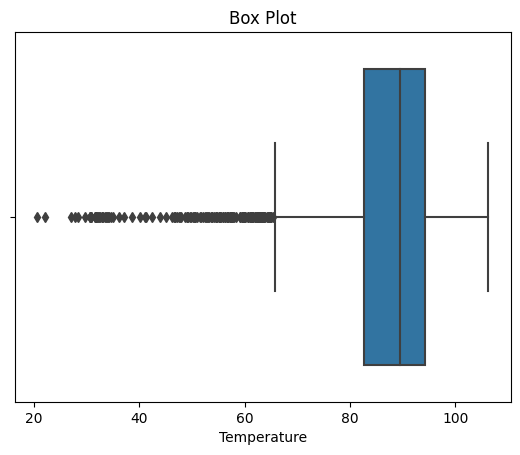

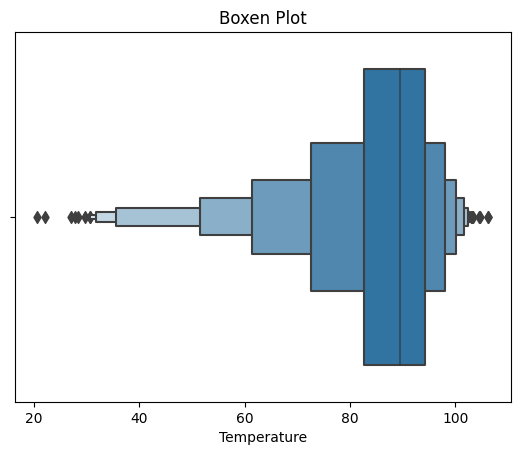

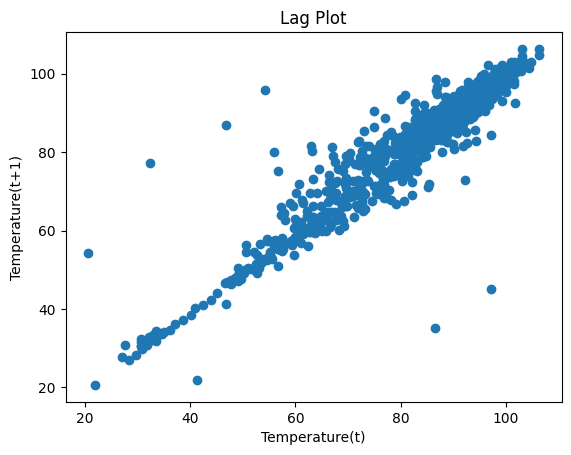

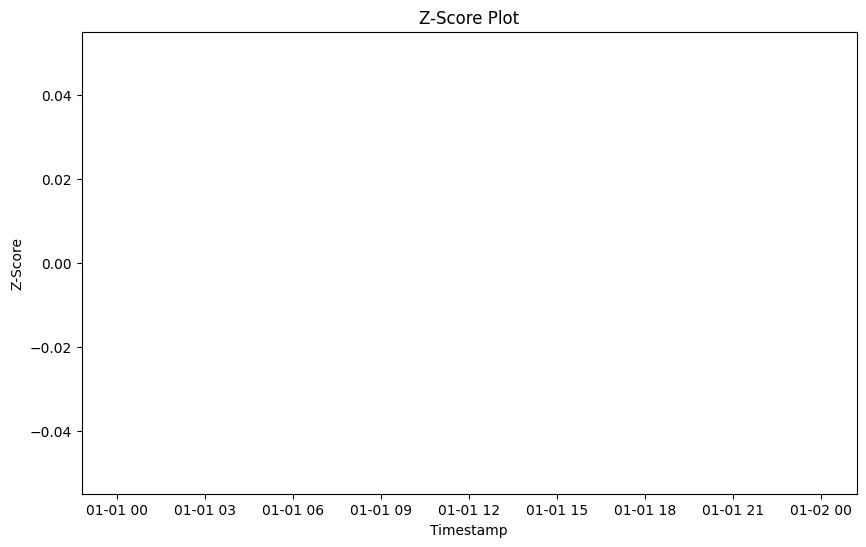

timestamp
2013-02-12 21:00:00    78.011596
2013-02-12 22:00:00    80.598012
2013-02-12 23:00:00    81.625018
2013-02-13 00:00:00          NaN
2013-02-13 01:00:00          NaN
                         ...    
2014-12-02 19:00:00    97.351702
2014-12-02 20:00:00    94.759885
2014-12-02 21:00:00    98.165799
2014-12-02 22:00:00    97.762480
2014-12-02 23:00:00    95.542386
Freq: H, Name: ffill_imputed, Length: 15795, dtype: float64


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



sns.boxplot(x=hourly_df)
plt.xlabel('Temperature')
plt.title('Box Plot')
plt.show()


sns.boxenplot(x=hourly_df)
plt.xlabel('Temperature')
plt.title('Boxen Plot')
plt.show()


pd.plotting.lag_plot(hourly_df, lag=1)
plt.xlabel('Temperature(t)')
plt.ylabel('Temperature(t+1)')
plt.title('Lag Plot')
plt.show()


def iqr_outliers(data):
    """
    Identify outliers using the interquartile range (IQR) method.

    Args:
        data (pandas.Series): Series of data.

    Returns:
        pandas.Series: Boolean Series indicating outliers.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers


outliers_iqr = iqr_outliers(hourly_df)


z_scores = stats.zscore(hourly_df)


plt.figure(figsize=(10, 6))
plt.plot(hourly_df.index, z_scores)
plt.xlabel('Timestamp')
plt.ylabel('Z-Score')
plt.title('Z-Score Plot')
plt.show()
print(hourly_df)

#Outliers
Most of the outliers have temperature less than mean and median, i.e., are on the lower end. 